In [1]:
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy as np

In [2]:
salaries=pd.read_csv('../data/salaries_data.csv', encoding ='latin')
testeo=pd.read_csv('../data/testeo.csv',encoding='latin')

### Define variable y and remove it from the DF

In [3]:
y=salaries['salary_in_usd']

In [4]:
salaries2=salaries.drop(columns=['salary_in_usd'])

In [5]:
salaries2.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
495,2022,SE,FT,Data Engineer,100000,USD,US,100,US,M
496,2021,EN,FT,Big Data Engineer,435000,INR,IN,0,CH,L
497,2022,SE,FT,Data Architect,90700,USD,CA,100,CA,M
498,2021,MI,FT,Data Engineer,60000,GBP,GB,100,GB,L
499,2021,EN,FT,Computer Vision Software Engineer,70000,USD,US,100,US,M


In [6]:
salaries2.shape

(500, 10)

### Concatenate salaries and testeo to apply changes to both at the same time

In [7]:
salaries3= pd.concat([salaries2,testeo])

salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


#### Drop salary and salary currency because it tricks the model and the error

In [8]:
salaries3=salaries3.drop(columns=['salary','salary_currency'])

In [10]:
salaries3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 106
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         607 non-null    int64 
 1   experience_level  607 non-null    object
 2   employment_type   607 non-null    object
 3   job_title         607 non-null    object
 4   company_location  607 non-null    object
 5   company_size      607 non-null    object
dtypes: int64(1), object(5)
memory usage: 33.2+ KB


In [11]:
salaries3.shape

(607, 6)

In [12]:
salaries3=salaries3.reset_index().drop('index', axis=1)

In [13]:
salaries3.tail()

,work_year,experience_level,employment_type,job_title,company_location,company_size
602,2022,SE,FT,Data Analyst,US,M
603,2022,SE,FT,Data Architect,US,M
604,2022,SE,FT,Data Scientist,US,M
605,2022,EN,FT,Data Analyst,CA,M
606,2022,SE,FT,Data Analyst,US,M


### Examinate the columns and data

In [14]:
salaries3.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [15]:
salaries3['job_title'].replace(['Computer Vision Software Engineer','Head of Data Science' ,'Staff Data Scientist','Machine Learning Infrastructure Engineer'],['Computer Vision Engineer','Director of Data Science','Data Scientist','Machine Learning Engineer'], inplace=True)

In [18]:
salaries3.company_location.value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
PT      4
AT      4
PL      4
NL      4
PK      3
DK      3
AU      3
BR      3
AE      3
TR      3
LU      3
MX      3
CH      2
IT      2
CZ      2
RU      2
BE      2
SI      2
NG      2
CN      2
MT      1
HN      1
IL      1
RO      1
SG      1
CO      1
IQ      1
HR      1
NZ      1
HU      1
IR      1
DZ      1
EE      1
UA      1
CL      1
KE      1
VN      1
IE      1
AS      1
MD      1
MY      1
Name: company_location, dtype: int64

In [19]:
salaries3.job_title.value_counts()

Data Scientist                        144
Data Engineer                         132
Data Analyst                           97
Machine Learning Engineer              44
Research Scientist                     16
Data Science Manager                   12
Director of Data Science               11
Data Architect                         11
Computer Vision Engineer                9
Machine Learning Scientist              8
Big Data Engineer                       8
Data Science Consultant                 7
Principal Data Scientist                7
Data Analytics Manager                  7
AI Scientist                            7
Lead Data Engineer                      6
BI Data Analyst                         6
ML Engineer                             6
Business Data Analyst                   5
Data Engineering Manager                5
Applied Data Scientist                  5
Head of Data                            5
Applied Machine Learning Scientist      4
Data Analytics Engineer           

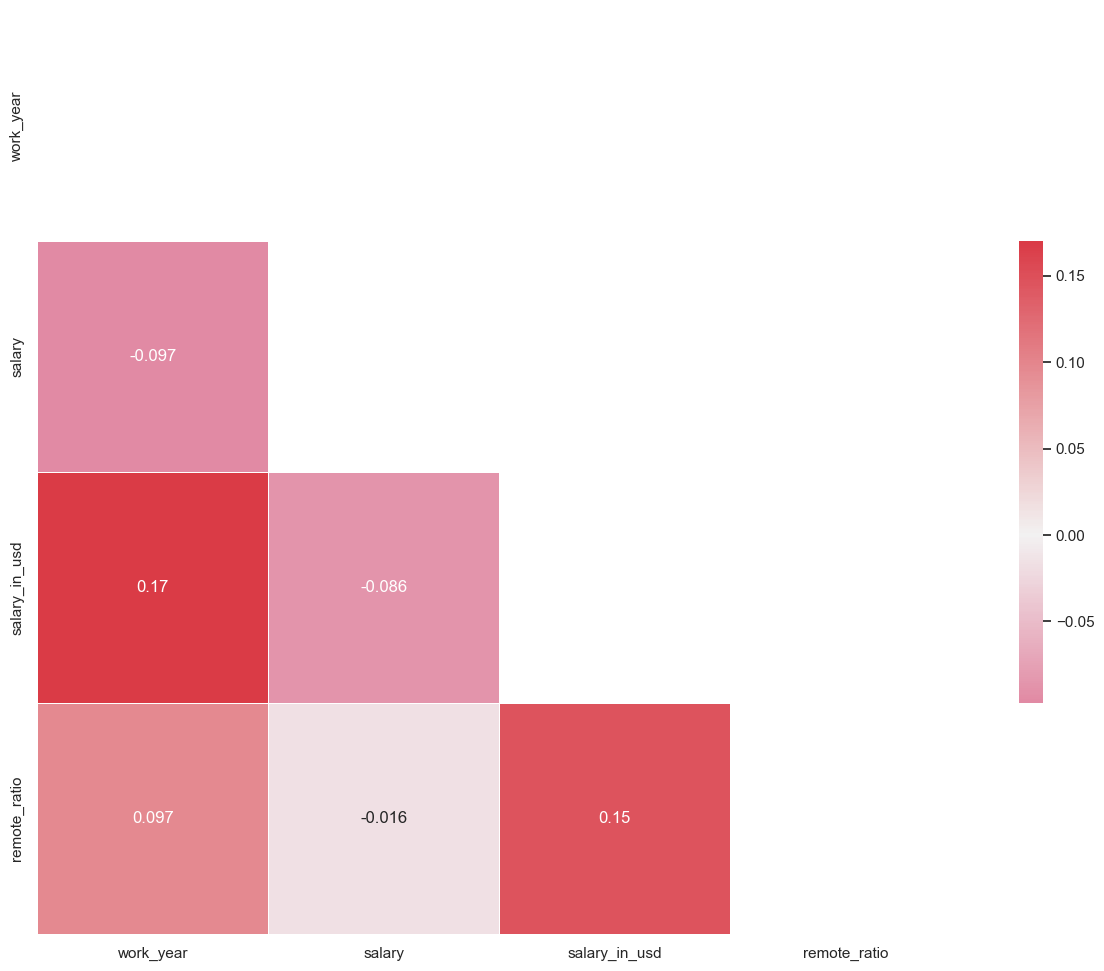

In [20]:
# buscando colinealidad

plt.figure(figsize=(15,12))

sns.set(style='white')

mask=np.triu(np.ones_like(salaries.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(salaries.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [21]:
salaries3.isna().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
company_location    0
company_size        0
dtype: int64

In [22]:
for c in salaries3.columns:       #valores unicos de cada columna
    
    columna=c
    
    print(c,'- valores únicos: ',len(salaries3[columna].unique()))

work_year - valores únicos:  3
experience_level - valores únicos:  4
employment_type - valores únicos:  4
job_title - valores únicos:  46
company_location - valores únicos:  50
company_size - valores únicos:  3


In [23]:
salaries3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         607 non-null    int64 
 1   experience_level  607 non-null    object
 2   employment_type   607 non-null    object
 3   job_title         607 non-null    object
 4   company_location  607 non-null    object
 5   company_size      607 non-null    object
dtypes: int64(1), object(5)
memory usage: 28.6+ KB


### Apply Label Encoder to all the object columns

In [24]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

salaries3.experience_level=LabelEncoder().fit_transform(salaries3.experience_level)

salaries3.tail()

,work_year,experience_level,employment_type,job_title,company_location,company_size
602,2022,3,FT,Data Analyst,US,M
603,2022,3,FT,Data Architect,US,M
604,2022,3,FT,Data Scientist,US,M
605,2022,0,FT,Data Analyst,CA,M
606,2022,3,FT,Data Analyst,US,M


In [25]:
salaries3.employment_type=LabelEncoder().fit_transform(salaries3.employment_type)

salaries3.head()

,work_year,experience_level,employment_type,job_title,company_location,company_size
0,2022,3,2,Data Engineer,US,M
1,2022,3,2,Data Engineer,US,M
2,2021,2,2,BI Data Analyst,US,M
3,2021,2,0,ML Engineer,US,L
4,2021,2,2,Data Engineer,US,L


In [26]:
salaries3.job_title=LabelEncoder().fit_transform(salaries3.job_title)

salaries3.head()

,work_year,experience_level,employment_type,job_title,company_location,company_size
0,2022,3,2,16,US,M
1,2022,3,2,16,US,M
2,2021,2,2,5,US,M
3,2021,2,0,34,US,L
4,2021,2,2,16,US,L


In [28]:
salaries3.company_location=LabelEncoder().fit_transform(salaries3.company_location)

salaries3.head()

,work_year,experience_level,employment_type,job_title,company_location,company_size
0,2022,3,2,16,48,M
1,2022,3,2,16,48,M
2,2021,2,2,5,48,M
3,2021,2,0,34,48,L
4,2021,2,2,16,48,L


In [29]:
salaries3.company_size=LabelEncoder().fit_transform(salaries3.company_size)

salaries3.tail()

,work_year,experience_level,employment_type,job_title,company_location,company_size
602,2022,3,2,11,48,1
603,2022,3,2,15,48,1
604,2022,3,2,21,48,1
605,2022,0,2,11,6,1
606,2022,3,2,11,48,1


### Apply StandarScaler to normalize the data

In [30]:
from sklearn.preprocessing import StandardScaler
ss=pd.DataFrame(StandardScaler().fit_transform(salaries3._get_numeric_data()),  # standardize numeric columns
         columns=salaries3._get_numeric_data().columns)

In [31]:
ss.tail()

,work_year,experience_level,employment_type,job_title,company_location,company_size
602,0.859977,0.843493,0.027854,-0.888888,0.756121,0.289918
603,0.859977,0.843493,0.027854,-0.482443,0.756121,0.289918
604,0.859977,0.843493,0.027854,0.127223,0.756121,0.289918
605,0.859977,-2.060100,0.027854,-0.888888,-1.865824,0.289918
606,0.859977,0.843493,0.027854,-0.888888,0.756121,0.289918


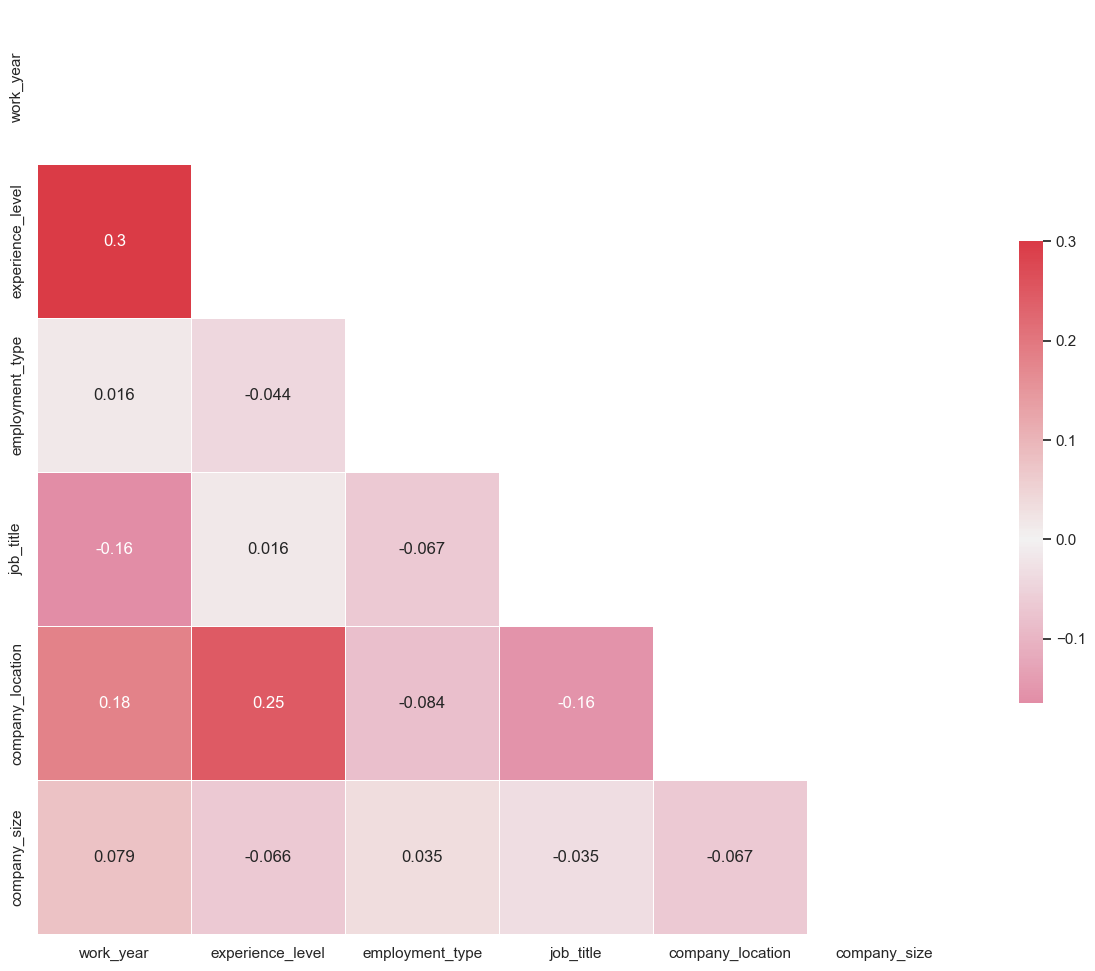

In [32]:
plt.figure(figsize=(15,12))

sns.set(style='white')

mask=np.triu(np.ones_like(ss.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(ss.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

### Split the DF after the transformations to Salaries and Testeo 

In [33]:
salaries_nor=ss[0:500]
salaries_nor.tail()

,work_year,experience_level,employment_type,job_title,company_location,company_size
495,0.859977,0.843493,0.027854,-0.380832,0.756121,0.289918
496,-0.586023,-2.060100,0.027854,-1.295332,-1.803397,-1.240346
497,0.859977,0.843493,0.027854,-0.482443,-1.865824,0.289918
498,-0.586023,-0.124371,0.027854,-0.380832,-1.116697,-1.240346
499,-0.586023,-2.060100,0.027854,-0.990499,0.756121,0.289918


In [34]:
salaries_nor.to_csv('../data/salaries_nor.csv')

In [35]:
testeo_nor=ss[500:]
testeo_nor
testeo_nor=testeo_nor.reset_index().drop('index', axis=1)
testeo_nor.head()


,work_year,experience_level,employment_type,job_title,company_location,company_size
0,-2.032024,0.843493,0.027854,1.854611,-0.429997,1.820182
1,-2.032024,-0.124371,0.027854,1.041723,0.756121,-1.240346
2,-2.032024,-0.124371,0.027854,-0.888888,0.756121,-1.240346
3,-2.032024,-0.124371,0.027854,1.651389,-1.678542,0.289918
4,-2.032024,-0.124371,0.027854,2.464278,-0.679706,-1.240346


In [36]:
testeo_nor.to_csv('../data/testeo_nor.csv')

In [37]:
X=salaries_nor

In [38]:
X.shape, y.shape

((500, 6), (500,))

### Preparation for testing

In [39]:
from sklearn.model_selection import train_test_split as tts 
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.model_selection import GridSearchCV        # por fuerza bruta
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 6), (100, 6), (400,), (100,))

In [40]:
X_train, X_test, y_train, y_test = tts(X, y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 6), (100, 6), (400,), (100,))

### Models evaluation

In [41]:
import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [42]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 90%|██████████████████████████████████████▌    | 26/29 [00:07<00:00,  5.28it/s]

[18:04:50] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|███████████████████████████████████████████| 29/29 [00:15<00:00,  1.91it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.03,0.03,None,0.03,0.04
BernoulliNB,0.03,0.02,None,0.01,0.02
Perceptron,0.02,0.02,None,0.01,0.22
AdaBoostClassifier,0.01,0.01,None,0.00,0.35
GaussianNB,0.01,0.01,None,0.01,0.06
SVC,0.02,0.01,None,0.01,0.20
LogisticRegression,0.02,0.01,None,0.01,0.43
LinearSVC,0.02,0.01,None,0.01,0.84
LinearDiscriminantAnalysis,0.02,0.01,None,0.01,0.02


In [43]:
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████| 42/42 [00:04<00:00,  8.95it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.38,0.42,47732.62,0.22
LGBMRegressor,0.38,0.42,47815.64,0.05
RandomForestRegressor,0.27,0.31,51959.61,0.23
BaggingRegressor,0.24,0.29,52858.85,0.05
HuberRegressor,0.23,0.27,53276.40,0.02
PassiveAggressiveRegressor,0.22,0.26,53651.15,0.05
RANSACRegressor,0.22,0.26,53677.92,0.09
OrthogonalMatchingPursuitCV,0.21,0.26,53762.35,0.02
BayesianRidge,0.19,0.24,54435.44,0.02


### Applying LGBMRegressor

In [ ]:
import lightgbm as ltb

In [ ]:
model = ltb.LGBMRegressor()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
mse(y_test, y_pred, squared=False)

In [ ]:
y_predOK=rfr.predict(testeo_nor)

In [ ]:
pruebaOK = pd.DataFrame(y_predOK, columns = ['salary_in_usd'])
pruebaOK

In [ ]:
pruebaOK.to_csv('../data/pruebaOK.csv',index_label='id')

### Applying RFR model

In [ ]:
rfr=RFR()

rfr.fit(X_train, y_train)

y_pred=rfr.predict(X_test)

train_score=rfr.score(X_train, y_train)    # R2
test_score=rfr.score(X_test, y_test)

print (train_score, test_score)


In [ ]:
y_pred=rfr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error as mse  

In [ ]:
mse(y_test, y_pred, squared=False)

#### Test it vs the Testeo

In [ ]:
y_pred1=rfr.predict(testeo_nor)

In [ ]:
y_pred1

#### Create a DF from an array

In [ ]:
prueba = pd.DataFrame(y_pred1, columns = ['salary_in_usd'])
prueba

In [ ]:
prueba.to_csv('../data/prueba.csv',index_label='id')

### Apply SVC method

In [ ]:
from sklearn.svm import SVC

svc=SVC(probability=True)

svc.fit(X_train, y_train)

y_prob=svc.predict_proba(X_test)


In [ ]:
mse(y_test, y_pred, squared=False)

In [ ]:
y_pred2=svc.predict(testeo_nor)

In [ ]:
prueba2 = pd.DataFrame(y_pred2, columns = ['salary_in_usd'])
prueba2

In [ ]:
prueba2.to_csv('../data/prueba2.csv',index_label='id')